<a href="https://colab.research.google.com/github/AngieDuarteA01/Ciencia-de-datos-/blob/main/Medidas_centrales_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install wquantiles


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
love=pd.read_csv("/content/marriage_data_india.csv")
love

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes
2,3,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Rural,No,Medium,No,0,High,25,No,No,No
3,4,Arranged,26,Female,School,Different,Hindu,Yes,Urban,Yes,Low,No,0,High,12,No,Yes,No
4,5,Love,32,Female,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,1,Middle,41,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Love,25,Male,Postgraduate,Different,Hindu,Yes,Urban,Not Disclosed,Medium,No,5,Low,38,Yes,No,No
9996,9997,Arranged,31,Female,School,Same,Hindu,Partial,Rural,No,High,No,4,Low,1,No,No,No
9997,9998,Love,22,Male,Graduate,Same,Hindu,Partial,Rural,Yes,Medium,No,2,Low,24,No,Yes,No
9998,9999,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Urban,No,Medium,No,3,Middle,28,No,No,No


In [ ]:
love.head(2)
#Los primeros datos de la tabla

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
0,1,Love,23,Male,Graduate,Different,Hindu,No,Urban,No,Medium,Yes,5,Middle,34,No,No,No
1,2,Love,28,Female,School,Same,Hindu,Yes,Rural,Yes,Low,No,3,Middle,42,No,No,Yes


In [ ]:
love.tail(2)
#Los datos de la cola

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
9998,9999,Arranged,39,Male,Postgraduate,Same,Muslim,Yes,Urban,No,Medium,No,3,Middle,28,No,No,No
9999,10000,Arranged,36,Male,School,Different,Hindu,Partial,Urban,Yes,High,No,3,Middle,7,Yes,No,Yes


In [ ]:
love.sample(2)
#Datos aletorios

,ID,Marriage_Type,Age_at_Marriage,Gender,Education_Level,Caste_Match,Religion,Parental_Approval,Urban_Rural,Dowry_Exchanged,Marital_Satisfaction,Divorce_Status,Children_Count,Income_Level,Years_Since_Marriage,Spouse_Working,Inter-Caste,Inter-Religion
9300,9301,Love,29,Male,Graduate,Different,Hindu,Yes,Urban,Yes,Medium,No,2,Middle,4,No,Yes,No
5697,5698,Arranged,37,Male,Graduate,Same,Hindu,Yes,Urban,Yes,Low,No,0,High,46,Yes,No,No


In [ ]:
love.columns
#La columnas del datadrame

Index(['ID', 'Marriage_Type', 'Age_at_Marriage', 'Gender', 'Education_Level',
       'Caste_Match', 'Religion', 'Parental_Approval', 'Urban_Rural',
       'Dowry_Exchanged', 'Marital_Satisfaction', 'Divorce_Status',
       'Children_Count', 'Income_Level', 'Years_Since_Marriage',
       'Spouse_Working', 'Inter-Caste', 'Inter-Religion'],
      dtype='object')

In [ ]:
love.info()
#Hallar datos non , y tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10000 non-null  int64 
 1   Marriage_Type         10000 non-null  object
 2   Age_at_Marriage       10000 non-null  int64 
 3   Gender                10000 non-null  object
 4   Education_Level       10000 non-null  object
 5   Caste_Match           10000 non-null  object
 6   Religion              10000 non-null  object
 7   Parental_Approval     10000 non-null  object
 8   Urban_Rural           10000 non-null  object
 9   Dowry_Exchanged       10000 non-null  object
 10  Marital_Satisfaction  10000 non-null  object
 11  Divorce_Status        10000 non-null  object
 12  Children_Count        10000 non-null  int64 
 13  Income_Level          10000 non-null  object
 14  Years_Since_Marriage  10000 non-null  int64 
 15  Spouse_Working        10000 non-null 

In [ ]:
love.describe()

,ID,Age_at_Marriage,Children_Count,Years_Since_Marriage
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,28.503800,2.508800,24.973800
std,2886.89568,6.279564,1.695467,14.054838
min,1.00000,18.000000,0.000000,1.000000
25%,2500.75000,23.000000,1.000000,13.000000
50%,5000.50000,29.000000,3.000000,25.000000
75%,7500.25000,34.000000,4.000000,37.000000
max,10000.00000,39.000000,5.000000,49.000000


In [ ]:
love["Children_Count"].mean()
#Valor promedio de Hijos

2.5088

In [ ]:
trim_mean(love["Children_Count"], 0.1)
#Comparamos la dispersion de los datos con respecto al promedio , lo cual nos permite observar que los datos no estan tan dispersos

2.511

In [ ]:
np.average(love["Years_Since_Marriage"], weights=love["Children_Count"])
#el promedio que llevan casados segun la cantidad de hijos

24.995974170918366

<Axes: ylabel='Frequency'>

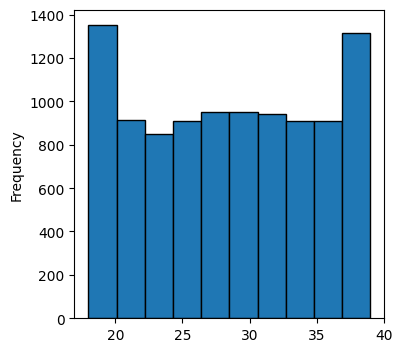

In [ ]:
love["Age_at_Marriage"].plot.hist(figsize=(4,4),edgecolor='k')
#Este gráfico muestra la con que frecuencia se casan los hindus a una determinada edad


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packa

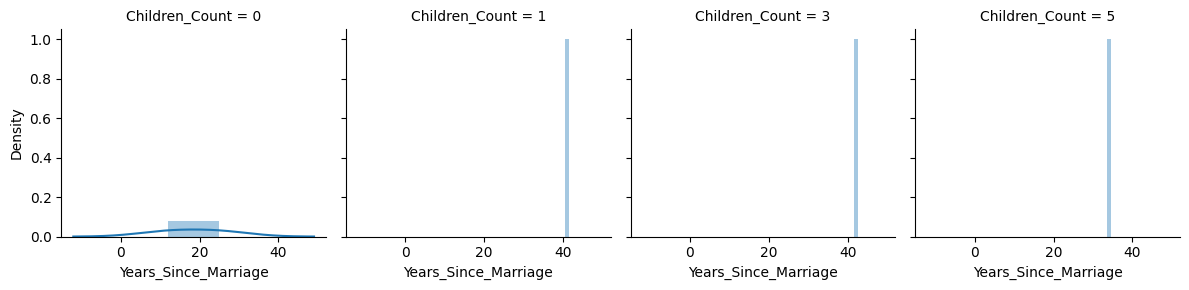

In [ ]:
analisis=love.head()
g=sns.FacetGrid(analisis,col="Children_Count")
g.map(sns.distplot,"Years_Since_Marriage")

#Podemos interpretar que no suele existir dispersion entre las personas que llevan de 35 a mas años de casados en el mumero de hijos ,
#por el contrario si estan entre (10 a 25) hallamos mas variacion en el numero de hijos
#Si tienen entre 40-42 años de casados suelen tener 1 hijo
#Si tienen entre 43-44 años suelen tener 2 hijos
#Si tienes entre 34 a 37 años suelen tener 5 hijos